# Pandas Exercise

We  look at a data set and apply various functions rom Pandas library to examine or explore the data.

## Data

We make use of two data sets for this tutorial.

- `police.csv` is the Rhode Island dataset from the Stanford Open Policing Project, made available under the Open Data Commons Attribution License.

- `ted.csv` is the TED Talks dataset from Kaggle Datasets, made available under the CC BY-NC-SA 4.0 license.

## Resources

The tutorial follows on from many topics covered by [Data School](https://www.dataschool.io) (Kevin Markham) channel on YouTube and various other resources online. We also make use of the Pandas documentation frequently. 


In [51]:
# load modules
import pandas as pd
pd.__version__

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


Note that  the `%matplotliub inline` command is used to display plots generated by Matplotlib within a Jupyter Notebook.

By default, Matplotlib generates plots as separate windows, which can be inconvenient when working within a notebook environment

**Table of contents**<a id='toc0_'></a>    
  
- [Introducing the dataset](#toc1_3_)    
- [Removing columns](#toc1_4_)    
- [Comparing groups](#toc1_5_)    
- [Examining relationships](#toc2_)    
- [Handling missing values](#toc3_)    
- [Using string methods](#toc4_)    
- [Combining dates and times](#toc5_)    
- [Plotting a time series](#toc6_)    
- [Creating useful plots](#toc7_)    
- [Fixing bad data](#toc8_)    
- [More Exploring](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_3_'></a>[Introducing the dataset](#toc0_)

- Stanford Open Policing Project
- https://openpolicing.stanford.edu/

We took an extract of the data set and removed some columns  that were not of interest. 

In [52]:
# read in data
ri = pd.read_csv('police.csv') # ri stands for Rhode Island

# view data
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [53]:
# columns and rows
ri.shape

(91741, 15)

In [54]:
# data types
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [55]:
# Missing data counts
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# <a id='toc1_4_'></a>[Removing columns](#toc0_)

We remove the column that only contains missing values.

In [56]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
ri.drop('county_name', axis='columns', inplace=True)

The `drop()` method is being used to drop a column from the DataFrame. The column to be dropped is specified by the 'county_name' argument, and the `axis='columns'` argument specifies that the operation should be applied to columns rather than rows.

In [57]:
# check new shape
ri.shape

# check columns
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

## <a id='toc1_5_'></a>[Comparing groups](#toc0_)

We see whether men or women speed more often.

In [58]:
# when someone is stopped for speeding, how often is it a man or woman?
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [59]:
# all incidents where violation  was speeding
ri[ri.violation=="Speeding"]

# now  get driver genders
ri[ri.violation=="Speeding"].driver_gender

# get value counts 
ri[ri.violation=="Speeding"].driver_gender.value_counts()


M    32979
F    15482
Name: driver_gender, dtype: int64

In [60]:
# alternative approach
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [61]:
# when a man is pulled over, how often is it for speeding?
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

# repeat for women
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

# combines the two lines above
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

## <a id='toc2_'></a>[Examining relationships](#toc0_)

We want to look at whether gender affects who gets searched during a stop.

In [62]:
# look at data again
ri.head(5)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [63]:
# look at totals first
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [64]:
# search rate by gender
ri.groupby("driver_gender").search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [65]:
# look at search rate for each incident for each gender
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

## <a id='toc3_'></a>[Handling missing values](#toc0_)

Let's look at why search_type variable has so many missing data. 

In [66]:
# again look at number missing data
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [67]:
# maybe search_type is missing any time search_conducted is False?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [68]:
# test that theory, why is the Series empty?
ri[ri.search_conducted == False].search_type.value_counts(dropna=False) ## value_counts ignores missing values by default


NaN    88545
Name: search_type, dtype: int64

In [69]:
# when search_conducted is True, search_type is never missing
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

## <a id='toc4_'></a>[Using string methods](#toc0_)

We want to know how often is the driver frisked during a search.

In [70]:
# multiple types are separated by commas
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [71]:
# use bracket notation when creating a column
ri['frisk'] = ri.search_type == 'Protective Frisk'

# includes partial matches - NOW WE GET ALL FRISKS
ri['frisk'] = ri.search_type.str.contains('Protective Frisk') # Use string methods to find partial matches

In [72]:
# str.contains preserved missing values from search_type
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [73]:
# frisk rate during a search
ri.frisk.mean()

# manual
274/(2922+274)

0.08573216520650813

## <a id='toc5_'></a>[Combining dates and times](#toc0_)

Which year had the least number of stops?

In [74]:
# check data and what info we need
ri.head(5)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [75]:
# this works, but there's a better way
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [76]:
# make sure you create this column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [77]:
# date time object was created
ri.stop_datetime

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
                ...        
91736   2015-12-31 20:27:00
91737   2015-12-31 20:35:00
91738   2015-12-31 20:45:00
91739   2015-12-31 21:42:00
91740   2015-12-31 22:46:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [78]:
# why is 2005 so much smaller?
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

## <a id='toc6_'></a>[Plotting a time series](#toc0_)

How does drug activity change by time of day? 

In [79]:
ri.drugs_related_stop

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: drugs_related_stop, Length: 91741, dtype: bool

In [80]:
# we use our that new data time object we had to group by hour
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

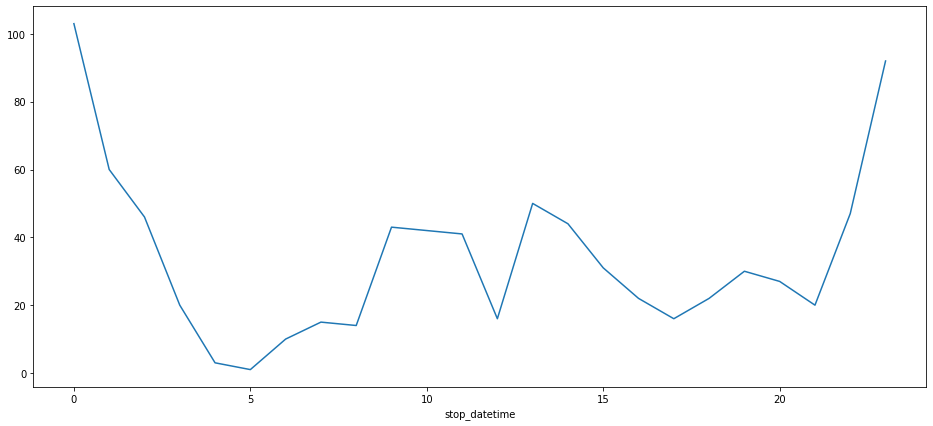

In [81]:
# line plot by default (for a Series)
#ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

# or we can count drug-related stops by hour
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot(figsize=(16,7));

## <a id='toc7_'></a>[Creating useful plots](#toc0_)

We look at whether most stops occur at night

In [82]:
# look at stops per hour
ri.stop_datetime.dt.hour.value_counts()

# need to sort hours
ri.stop_datetime.dt.hour.value_counts().sort_index()


0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

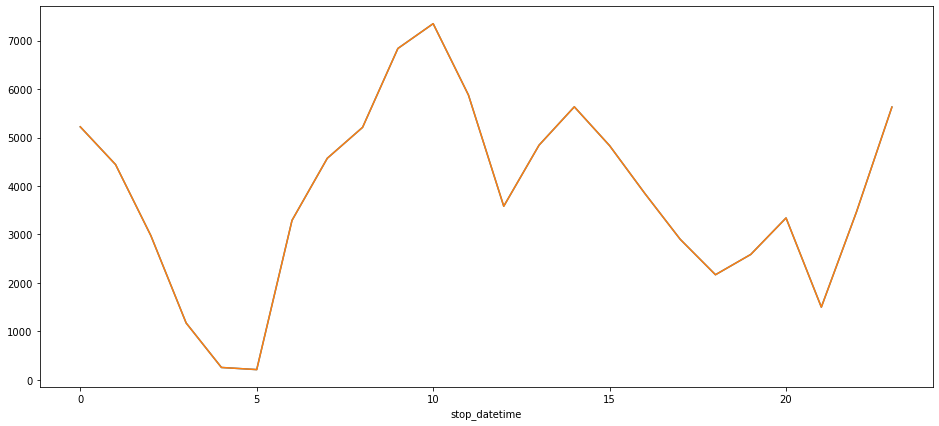

In [83]:
# plot
ri.stop_datetime.dt.hour.value_counts().sort_index().plot(figsize=(16,7));

# or can do below
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot(figsize=(16,7));

## <a id='toc8_'></a>[Fixing bad data](#toc0_)

We shall be finding the bad data in the `stop_duration` column and fix it.

In [84]:
# mark bad data as missing
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [85]:
# change 1 and 2 to NaN
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = "NaN"

In [86]:
# confusing!
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [87]:
# replace 'NaN' string with actual NaN value
import numpy as np
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [88]:
# Done
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

## <a id='toc9_'></a>[More Exploring](#toc0_)

Let's look what the the mean stop_duration for each violation_raw.

In [89]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [90]:
# types of violations
ri.violation_raw.unique()

# stop durations
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan], dtype=object)

In [91]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

A dictionary called `mapping` is being created that maps string values to integer values. The `map()` method of the `ri.stop_duration` column is then being used to apply this mapping to each value in the column. The result of this operation is a new series, which is being assigned to a new column in the `ri` DataFrame called `stop_minutes`.

- The `mapping` dictionary is created with keys that are strings representing ranges of time (e.g., '0-15 Min') and values that are integers representing the midpoint of those ranges (e.g., 8).

In [92]:
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [93]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [94]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


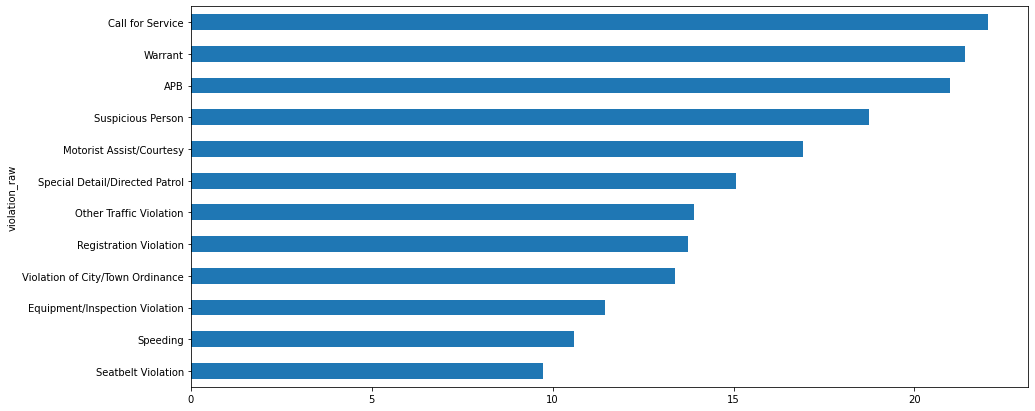

In [95]:
# how could this be made better?
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh', figsize=(15,7));

In [96]:
# good first step
ri.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


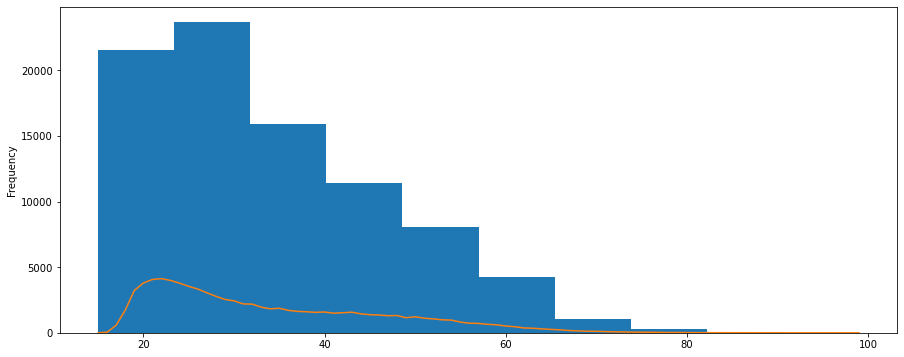

In [97]:
# histograms are excellent for displaying distributions
ri.driver_age.plot(kind='hist')

# similar to a histogram
ri.driver_age.value_counts().sort_index().plot(figsize=(15,6));